# Пример с распознаванием цифр

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Загружаем данные

In [2]:
digits = datasets.load_digits()

Пример первой цифры

In [3]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [5]:
import matplotlib.pyplot as plt

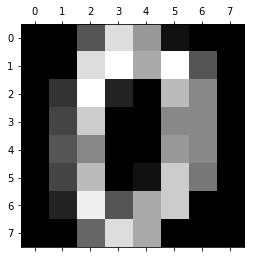

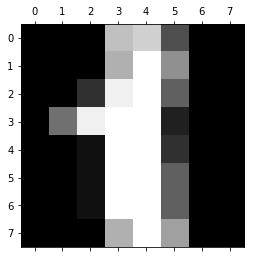

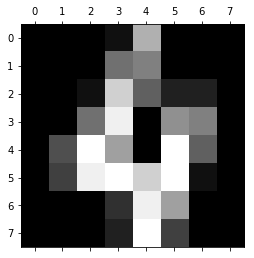

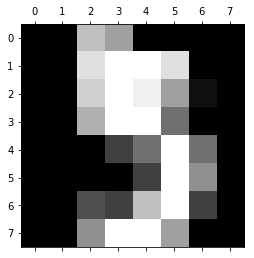

In [6]:
plt.gray()
for i in range(0, 6):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [7]:
X_digits = digits.data
Y_digits = digits.target

Количество цифр в данных

In [8]:
n_samples = len( X_digits )

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [9]:
split = int( n_samples * .9 )
split

1617

Обучающая выборка

In [10]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]


Формируем тестовую выборку и обучаем модель knn

In [11]:
X_test = X_digits[split:]
Y_test = Y_digits[split:]


Чтобы было интереснее, проведем CV с поиском наилучшего параметра количества ближайших соседей (ищем от 1 до 19)

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
params = [ {'n_neighbors': list( range(1, 10) )} ]

In [14]:
gs = GridSearchCV( KNeighborsClassifier(), param_grid = params, cv = 5, scoring='accuracy', return_train_score = False )

In [15]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [16]:
gs.best_params_

{'n_neighbors': 3}

Теперь подставляем нужное значение в модель и обучаемся

In [31]:
# n_neighbors = 2
n_neighbors = gs.best_params_['n_neighbors']

In [32]:
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
knn.score( X_test, Y_test )

0.9666666666666667

Итоговая метрика получилась меньше, чем, например для n=2, что странно, но другие scoring не особо работают...